##Análisis Univariado

###Realizar un pequeño análisis univariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.

####Link al Dataset

Los datos los obtuvimos del siguiente [link](https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv)

####¿Qué es el Análisis Univariado?

El análisis univariado, consiste en el análisis de cada una de las variables estudiadas por separado es decir, el análisis se basa exclusivamente en una única variable. 
La idea es poder obtener cierta información descriptiva de la variable, para lo cual nos apoyaremos en el uso de estadísticas y gráficos.

###Definición del problema

**Contexto**

Con el rápido desarrollo de la insdutria de la telecomunicación e incremento de la copetencia, se ha vuelto un desafío ampliar la base de usuarios y retener los existentes. Como es sabido, es más costosa la adquisición de nuevos usuarios que la retención de existentes. Es en este contexto que se vuelve fundamental aplicar analítica avanzada para predecir la posibilidad de que un cliente pueda abandonar la empresa e identificarlo antes de que su decisión este tomada y poder revertir la situación.

Librerías que utilizaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import ipywidgets as widgets
import missingno as msno
!pip install sidetable
import sidetable
from pandas.api.types import is_numeric_dtype
from pandas.core.frame import DataFrame
from prettytable import PrettyTable
from matplotlib.patches import Rectangle
from scipy.stats import norm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carga del DataSet

In [2]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


Eliminación la columna "Unnamed" (son los índices que quedaron al guardarse)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


Verificación de forma del conjunto de datos

In [5]:
print(f'La cantidad de columnas del dataset de Churn son {df.shape[1]} y {df.shape[0]} filas')

La cantidad de columnas del dataset de Churn son 51 y 10000 filas


Paso 1: Descubrimiento

Comprender los datos, la estructura, tipos y cantidad.

### Descripcion de Variables

Una de las primeras cosas que uno debe verificar es qué tipo de datos tengo. 

Inicialmente es poder revisar qué tipos de columnas tiene el dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [7]:
#Ver resumen del datatypes que arroja el .info():
df.dtypes.value_counts()

object     28
int64      14
float64     9
dtype: int64

Definición de las columnas del Dataset:

Son datos demográficos, de comportamiento, opinión, consumo y facturación de los clientes. 

A continuación, se describe cada columna del Dataset: 

***Object (28)*** 

1. Customer_id: Unique customer ID
2. Interaction: Unique IDs related to customer transactions, technical support, and sign ups
3. City: Customer city of residence as listed on the billing statement
4. State: Customer state of residence as listed on the billing statement
5. County: Customer county of residence as listed on the billing statement
6. Area: Area type (rural, urban, suburban), b ased on census data
7. Timezone: Time zone of customer residence based on customer’s sign upinformation
8. Job: Job of the customer (or invoiced person) as reported in sign up information
9. Education: Highest degree earned by customer as reported in sign up information
10. Employment: Employment status of customer as reported in sign up information
11. Marital: Marital status of customer as reported in sign up information
12. Gender: Customer self identification as male, female, or nonbinary
13. Churn: : Whether the customer discontinued service within the last month (yes/no)
14. Techie: Whether the customer considers themselves technically inclined (based on customer questionnaire when they signed up for services) (yes/no)
15. Contract: Number of times customer contacted technical support
16. Port_modem: Whether the customer has a portable modem (yes/no)
17. Tablet: Whether the customer owns a tablet such as iPad, Surface, etc. (yes/no)
18. InternetService: Customer’s internet service provider (DSL, fiber optic, None)
19. Phone: Whether the customer has a phone service (yes/no)
20. Multiple: Whether the customer has multiple lines (yes/no)
21. OnlineSecurity: Whether the customer has an online security add on (yes/no)
22. OnlineBackup: Whether the customer has an online backup add on (yes/no)
23. DeviceProtection: Whether the customer has device protection add on (yes/no)
24. TechSupport: Whether the customer has a technical support add on (yes/no)
25. StreamingTV: Whether the customer has streaming TV (yes/no)
26. StreamingMovies: Whether the customer has streaming movies (yes/no)
27. PaperlessBilling: Whether the customer has paperless billing (yes/no)
28. PaymentMethod: The customer’s payment method (electronic check, mailed check,bank (automatic bank transfer), credit card (automatic))

***Int64 (14)***

 1. CaseOrder: A placeholder variable to preserve the original order of the raw data file
 2. Zip: Customer zip c ode of residence as listed on the billing statement
 3. Population: Population within a mile radius of customer, based on census data
 4. Email: Number of emails sent to the customer in the last year (marketing or correspondence)
 5. Contacts: Number of times customer contacted technical support
 6. Yearly_equip_failure: The number of times customer’s equipment failed and had to be reset/replaced in the past year

The following variables represent responses to an eight question survey asking customers to rate the importance of various factors/sur faces on a scale of 1 to 8 (1 = most important,8 = least important):

7. Item1: Timely response
8. Item2: Timely fixes
9. Item3: Timely replacements
10. Item4: Reliability
11. Item5: Options
12. Item6: Respectful response
13. Item7: Courteous exchange
14. Item8: Evidence of active listening

***Float64 (9)***

1. Lat: Lat GPS coordinates of customer residence as listed on the billing statement
2. Lng: Lng GPS coordinates of customer residence as listed on the billing statement
3. Children: Number of children in customer’s household as reported in sign up information
4. Age: Age of customer as reported in sign up information
5. Income: Annual income of cu stomer as reported at time of sign up
6. Outage_sec_perweek: Average number of seconds per week of system outages in the customer’s neighborhood
7. Tenure: Number of months the customer has stayed with the provider
8. MonthlyCharge: The amount charged to the customer monthly. This value reflects an average per customer
9. Bandwidth_GB_Year: The average amount of data used, in GB, in a year by the customer

Guardado de datos originales en una tabla de backup

In [8]:
original = df

Identificación de variables Numéricas y Categóricas

In [9]:
num_columns = df.select_dtypes(include = ["number"]).columns
cat_columns = df.select_dtypes(include = ["object"]).columns

In [10]:
#Variables Numéricas:
num_columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [11]:
#Variables Categóricas:
cat_columns


Index(['Customer_id', 'Interaction', 'City', 'State', 'County', 'Area',
       'Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender',
       'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### Datos Básicos

Cálculo de información estadística y genérica de cada columna de un dataframe: En lugar dw utilizar el ".describe", con esta función obtendremos mayor grado de detalle

In [12]:
def univariado_info(df):
  '''Cálculo de información estadística y genérica de cada columna de un dataframe'''

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])

  for col in df:

      data_series = df[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

df_uni_stats = univariado_info(df)
df_uni_stats

,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
CaseOrder,10000,int64,0,10000,True,-,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0,0.0,-1.2
Customer_id,10000,object,0,10000,False,K409198,-,-,-,-,-,-,-,-,-
Interaction,10000,object,0,10000,False,aa90260b-4141-4a24-8e36-b04ce1f4f77b,-,-,-,-,-,-,-,-,-
City,10000,object,0,6058,False,Houston,-,-,-,-,-,-,-,-,-
State,10000,object,0,52,False,TX,-,-,-,-,-,-,-,-,-
County,10000,object,0,1620,False,Washington,-,-,-,-,-,-,-,-,-
Zip,10000,int64,0,8583,True,-,49153.3196,27532.196108,601.0,26292.5,48869.5,71866.5,99929.0,0.071069,-1.063105
Lat,10000,float64,0,8563,True,-,38.757567,5.437389,17.96612,35.341828,39.3958,42.106908,70.64066,0.077977,2.991702
Lng,10000,float64,0,8655,True,-,-90.782536,15.156142,-171.68815,-97.082812,-87.9188,-80.088745,-65.66785,-1.336513,2.605296
Population,10000,int64,0,5933,True,-,9756.5624,14432.698671,0.0,738.0,2910.5,13168.0,111850.0,2.205008,5.516785


Convertir todos los nombres de las columnas a lower case:

Hicimos esto para evitar problemas al escribir los nombres de las columnas, ya que python es case sensitive

In [13]:
def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [14]:
col_names = to_lowercase(df.columns.values)

df.set_axis(col_names,axis='columns',inplace=True)

df.columns.values

array(['caseorder', 'customer_id', 'interaction', 'city', 'state',
       'county', 'zip', 'lat', 'lng', 'population', 'area', 'timezone',
       'job', 'children', 'age', 'education', 'employment', 'income',
       'marital', 'gender', 'churn', 'outage_sec_perweek', 'email',
       'contacts', 'yearly_equip_failure', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'paymentmethod', 'tenure', 'monthlycharge',
       'bandwidth_gb_year', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8'], dtype=object)

In [15]:
# Con PrettyTable, genero una función que realiza una tabla resumen de los campos del dataset:

def df_explore(df):

    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df)

Shape:  (10000, 51)
+----------------------+---------+----------+-------+--------+--------------------------------------+
|        Column        |   Type  | Non-Null | Nulls | Unique |               Example                |
+----------------------+---------+----------+-------+--------+--------------------------------------+
|      caseorder       |  int64  |  10000   |   0   | 10000  |                  1                   |
|     customer_id      |  object |  10000   |   0   | 10000  |               K409198                |
|     interaction      |  object |  10000   |   0   | 10000  | aa90260b-4141-4a24-8e36-b04ce1f4f77b |
|         city         |  object |  10000   |   0   |  6058  |             Point Baker              |
|        state         |  object |  10000   |   0   |   52   |                  AK                  |
|        county        |  object |  10000   |   0   |  1620  |        Prince of Wales-Hyder         |
|         zip          |  int64  |  10000   |   0   |  8583  |

Confirmar si hay datos Duplicados y/o Nulos.

###Duplicados:

In [16]:
#Determinar si hay duplicados en la tabla
print(f'El data set tiene {df.duplicated().sum()} rows duplicadas')

#Dterminar si hay duplicados en los ID de clientes
print(f'La columna customer_id tiene {df.customer_id.duplicated().sum()} datos duplicados')

El data set tiene 0 rows duplicadas
La columna customer_id tiene 0 datos duplicados


###Nulos:

In [17]:
#Determnar si hay datos nulos en cada columna y cuántos:
df.isnull().sum()

caseorder                  0
customer_id                0
interaction                0
city                       0
state                      0
county                     0
zip                        0
lat                        0
lng                        0
population                 0
area                       0
timezone                   0
job                        0
children                2495
age                     2475
education                  0
employment                 0
income                  2490
marital                    0
gender                     0
churn                      0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  2477
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                   1026
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotecti

In [18]:
#No queremos ver las columnas que tienen 0 nulos, solamente aquellas que si tienen datos nulos:
valoresnull = df.isnull().sum()
valoresnull[valoresnull > 0]
valoresnull[valoresnull > 0].sort_values(ascending=False)

children             2495
income               2490
techie               2477
age                  2475
phone                1026
bandwidth_gb_year    1021
techsupport           991
tenure                931
dtype: int64

In [19]:
#Determinar la cantidad de Nulos de cada columna en porcentaje:
q_nulos = df.isnull().sum()[df.isnull().sum()>0]
porc_nulos = df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100

tabla_nulos = DataFrame([q_nulos,porc_nulos],index=['q_nulos','%_nulos']).T
tabla_nulos.sort_values('%_nulos',ascending=False)

,q_nulos,%_nulos
children,2495.0,24.95
income,2490.0,24.90
techie,2477.0,24.77
age,2475.0,24.75
phone,1026.0,10.26
bandwidth_gb_year,1021.0,10.21
techsupport,991.0,9.91
tenure,931.0,9.31


In [20]:
# Los valores null de la variable children corresponden a personas sin hijos? --> hipótesis: si no existe el valor 0 los nulls representan el 0
print(f'Los valores nulos de la variable children parecen ser datos faltantes, ya que los valores que no son nulos van de 0 (no tienen niños) a 10')
print(f'El menor valor de la variable children es {min(pd.Series(df.children.unique()).sort_values().values)}')

Los valores nulos de la variable children parecen ser datos faltantes, ya que los valores que no son nulos van de 0 (no tienen niños) a 10
El menor valor de la variable children es 0.0


In [21]:
# Los valores null de la variable tenure corresponden a clientes nuevos? --> hipótesis: si no existe el valor 0 los nulls representan el 0, siendo estos clientes que aún no han cumplido un mes de antiguedad

print(f'Los valores nulos de la variable tenure parecen ser clientes de menos de un mes de antiguedad, ya que el valor mínimo de la variable es 1')
print(f'El menor valor de la variable tenure es {min(df.tenure.unique())}')

Los valores nulos de la variable tenure parecen ser clientes de menos de un mes de antiguedad, ya que el valor mínimo de la variable es 1
El menor valor de la variable tenure es 1.00025934


Graficamos los datos nulos por columnas con Matrix

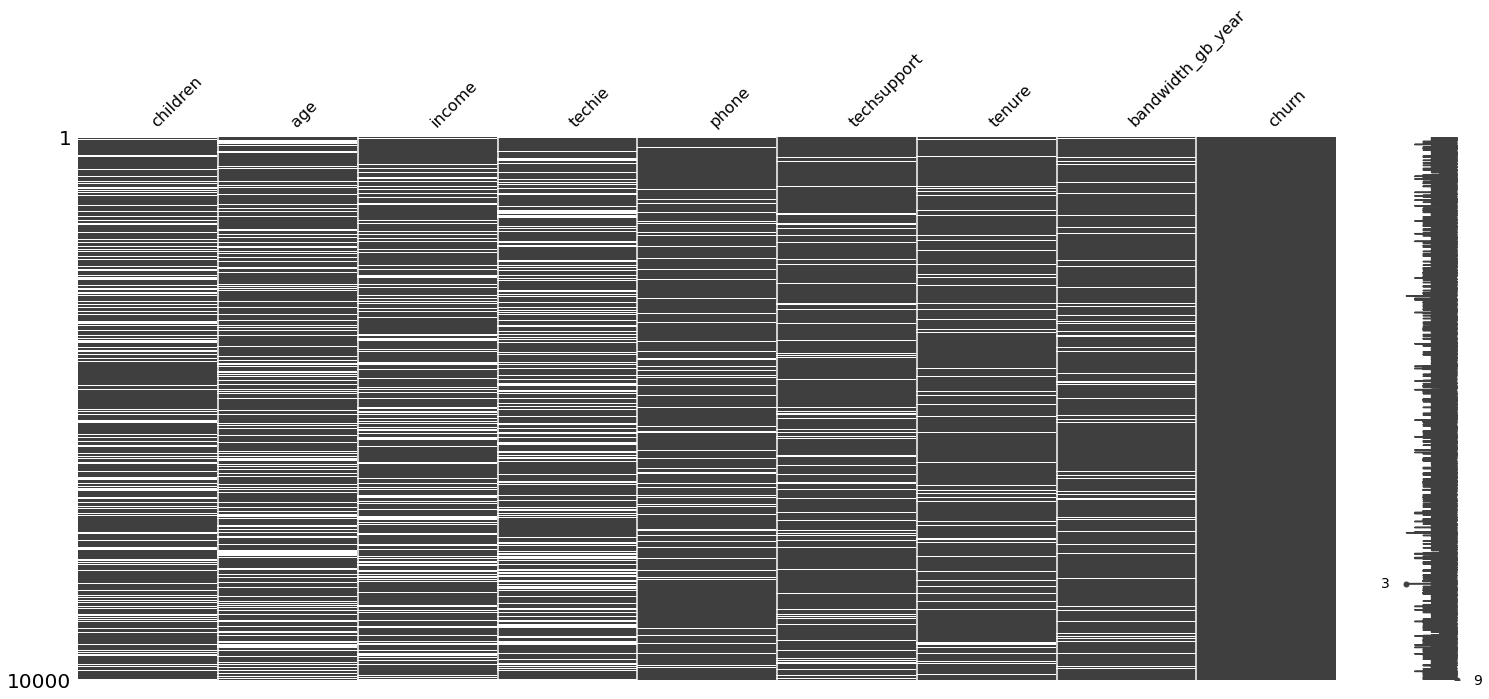

In [25]:
#Los valores nulos de las variables con ~25% de valores nulos corresponden a los mismos clientes?:
cols_nulos=list(tabla_nulos.index.values)
cols_nulos.append('churn')

msno.matrix(df[cols_nulos]);

Hay 8 columnas con datos nulos:

children, income, techie y age tienen aprox 25% de los datos nulos.

En principio, los datos nulos de tenure podría analizarse de cambiarlos por 0.

---
Ninguna columna supera el 90% de datos nulos como para que se justifique eliminarlos, con lo cual, buscaría completarlos.

Determinar si el tipo de datos esta bien:

In [23]:
df.dtypes

caseorder                 int64
customer_id              object
interaction              object
city                     object
state                    object
county                   object
zip                       int64
lat                     float64
lng                     float64
population                int64
area                     object
timezone                 object
job                      object
children                float64
age                     float64
education                object
employment               object
income                  float64
marital                  object
gender                   object
churn                    object
outage_sec_perweek      float64
email                     int64
contacts                  int64
yearly_equip_failure      int64
techie                   object
contract                 object
port_modem               object
tablet                   object
internetservice          object
phone                    object
multiple

La mayoría de los data types estan bien.

Algunos que podríamos cambiar:
* Children de float a int ya que es una numérica categórica
* Age podría ser int

Tabla de Fracuencias

Analizamos las variables Categóricas según Tabla de Frecuencias

In [ ]:
#Variable "area":
df.stb.freq(['area'])

,area,count,percent,cumulative_count,cumulative_percent
0,Suburban,3346,33.46,3346,33.46
1,Urban,3327,33.27,6673,66.73
2,Rural,3327,33.27,10000,100.00


Hay casos en los que buscaría agrupar los valores chicos en "Otros"

Tablas custom:

Aquí la idea es poder generar Tablas de Frecuencias para Variables Cuantitativas, y esas cuantitativas serán con intervalos o no.

El método de selección de intervalos será el de sturges.

In [ ]:
#Tabla de Frecuencias custom
import math

def sturges_intervals(data):
  
  k = 1 + 3.322 * math.log10(len(data))
  periodos = math.ceil(k)

  intervals = pd.interval_range(
      start=data.min(),
      end=data.max() + 1,
      periods=k,
      name="Intervalo",
      closed="left")
  
  inter = pd.IntervalIndex([
    pd.Interval( round(i.left,1), round(i.right,1), i.closed )
    for i in intervals])
  
  return inter, periodos


def freq_table(df, col, with_cuts=True):

  data = df[col]

  if not is_numeric_dtype(data) or not with_cuts:
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
  
  else:

    freq_tab = pd.DataFrame(index=sturges_intervals(data)[0])
    freq_tab["FreqAbs"] = pd.cut(data, bins=freq_tab.index).value_counts()
    freq_tab["Marca"]  = freq_tab.index.mid

    freq_tab["LimInf"] = freq_tab.index.left
    freq_tab["LimSup"] = freq_tab.index.right


  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

In [ ]:
freq_table(df, 'monthlycharge', with_cuts=True) 

,FreqAbs,Marca,LimInf,LimSup,FreqRel,FAbsAcumulada,FAbsRelativa
"[77.5, 94.6)",181,86.05,77.5,94.6,0.0181,181,0.0181
"[94.6, 111.7)",305,103.15,94.6,111.7,0.0305,486,0.0486
"[111.7, 128.8)",1080,120.25,111.7,128.8,0.1080,1566,0.1566
"[128.8, 145.9)",1187,137.35,128.8,145.9,0.1187,2753,0.2753
"[145.9, 163.0)",1805,154.45,145.9,163.0,0.1805,4558,0.4558
"[163.0, 180.1)",1323,171.55,163.0,180.1,0.1323,5881,0.5881
"[180.1, 197.2)",1299,188.65,180.1,197.2,0.1299,7180,0.7180
"[197.2, 214.3)",882,205.75,197.2,214.3,0.0882,8062,0.8062
"[214.3, 231.4)",679,222.85,214.3,231.4,0.0679,8741,0.8741
"[231.4, 248.5)",664,239.95,231.4,248.5,0.0664,9405,0.9405


Gráficos:

Haremos gráficos donde podamos trabajar variables numéricas y categóricas

In [ ]:
sturges_intervals(df[df['monthlycharge']<350]['monthlycharge'])

(IntervalIndex([[77.5, 94.6), [94.6, 111.7), [111.7, 128.8), [128.8, 145.9), [145.9, 163.0) ... [231.4, 248.5), [248.5, 265.6), [265.6, 282.7), [282.7, 299.8), [299.8, 316.9)], dtype='interval[float64, left]'),
 15)

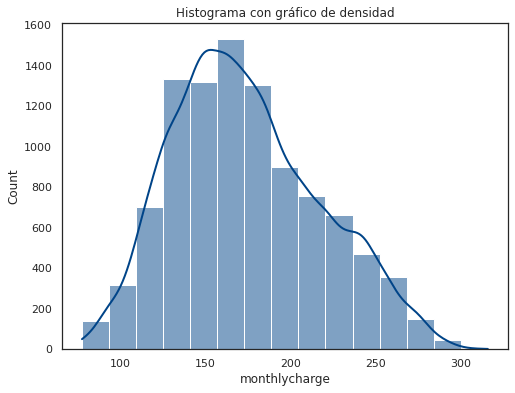

In [ ]:
#Variables Cuantitativas:
sns.set(style="white", rc={"lines.linewidth": 2})
fig, axes = plt.subplots(figsize=(8,6))
sns.histplot(x='monthlycharge',
            data=df[df['monthlycharge']<350] ,
            color='#004488',
            ax=axes,
            bins= sturges_intervals(df[df['monthlycharge']<350]['monthlycharge'])[1],
            kde=True).set(title='Histograma con gráfico de densidad');

En base al histograma, podemos ver que la distribución de valores en la variable monthlycharge, es normal.

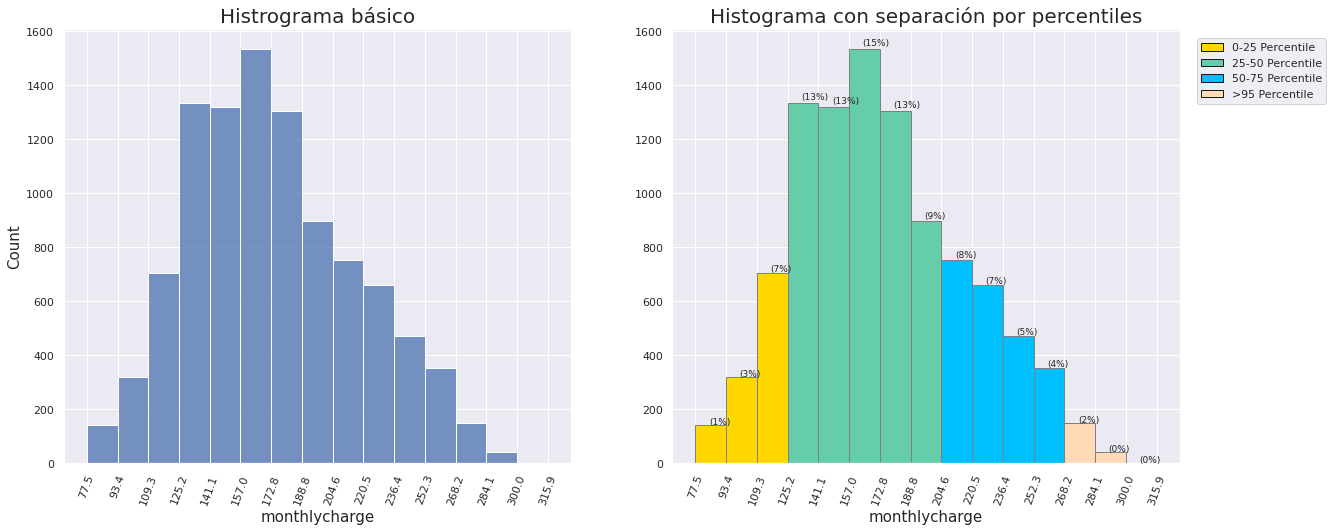

In [ ]:
#Variables Numérico-Categóricas:
fig , axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,8))

sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":15})
sns.histplot(data=df, x='monthlycharge', ax=axes[0], bins='sturges').set(title='Histrograma básico', );
axes[0].tick_params(axis='x', rotation=70)

data = df['monthlycharge']

perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

counts, bins, patches = axes[1].hist(data, facecolor=perc_50_colour, edgecolor='gray', bins='sturges')

axes[1].set_xticks(bins.round(2))
plt.xticks(rotation=70)

plt.title('Histograma con separación por percentiles', fontsize=20)
plt.xlabel('monthlycharge', fontsize=15)

q25, q75, q95 = np.percentile(data, [25, 75, 95])

for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

for i in range(len(bins)-1):
    bin_label = "({0:,.0f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99));

In [ ]:
counts 
bins

array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
        3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
        7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


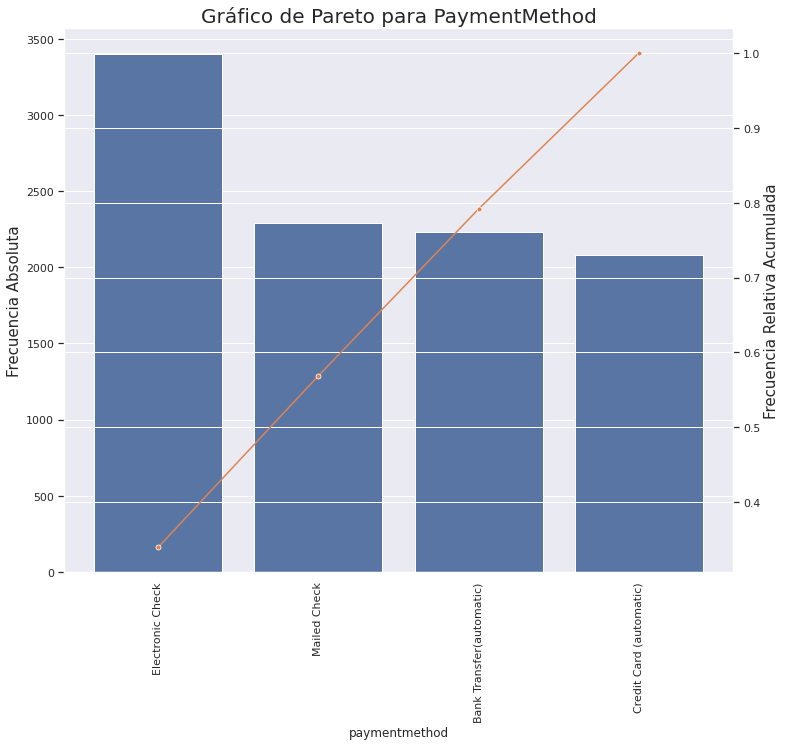

In [ ]:
#Variables Categóricas:
sns.set()
fig, axes = plt.subplots(figsize=(12,10))

paymentmethod = freq_table(df, 'paymentmethod', with_cuts=False).reset_index().sort_values('FreqAbs', ascending=False)

sns.barplot(data=paymentmethod, x='paymentmethod', y='FreqAbs', ax=axes, color="C0")
ax2 = axes.twinx()
sns.lineplot(paymentmethod['paymentmethod'], paymentmethod["FAbsRelativa"], color="C1", marker="o", ms=5, ax=ax2)
axes.set_title('Gráfico de Pareto para PaymentMethod', fontsize = 20)
axes.set_ylabel('Frecuencia Absoluta', fontsize=15)
ax2.set_ylabel('Frecuencia Relativa Acumulada', fontsize=15)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set();

In [ ]:
#Descripción de una variable numérica:
df['children'].describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: children, dtype: float64

In [ ]:
#Determinar si la variable es Numérico-Categórica (Num. discretos)
df.children.value_counts()

0.0     1919
1.0     1874
2.0     1100
3.0     1096
4.0      769
5.0      161
8.0      158
7.0      149
6.0      135
10.0      74
9.0       70
Name: children, dtype: int64

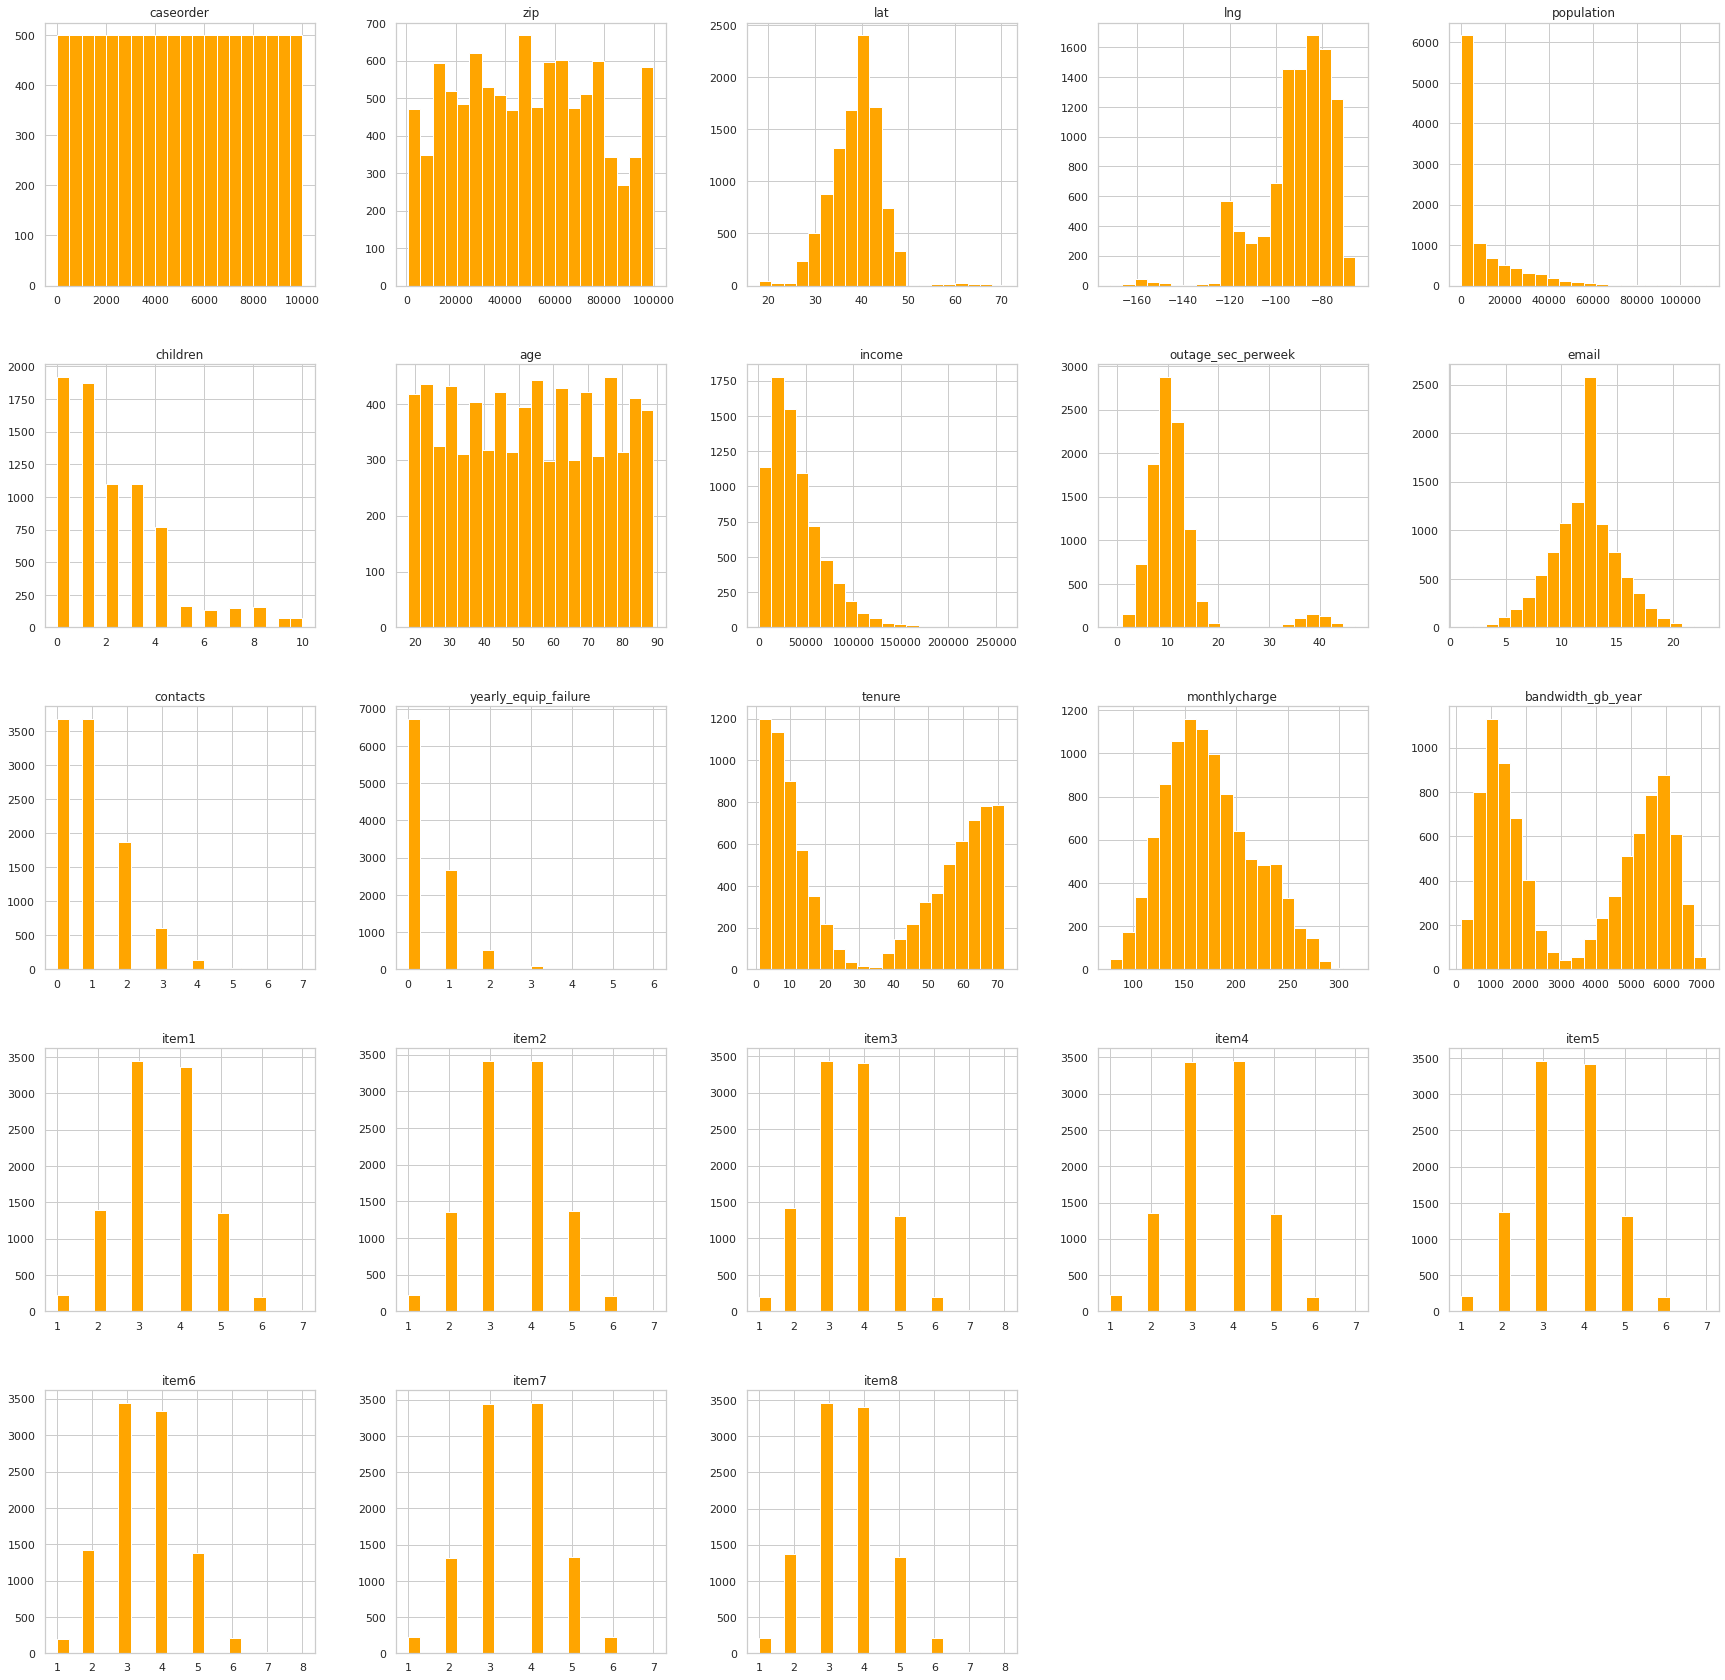

In [ ]:
#Histogramas de Variables Cuantitativas:
df.hist(figsize=(30,30), color='orange', bins=20)
plt.show()

In [ ]:
#Ordinales: caseorder

#Numérica Categóricas: customer_id, interaction, children, contract, tenure, item1, item2, item3, item4, item5, item6, item7, item8

#Categórica: city, state, county, area, timezone, job, education, employment, marital, gender, churn, outage_sec_perweek, yearly_equip_failure, techie, port_modem, tablet, internetservice, phone, multiple, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, paperlessbilling, paymentmethod, 

#Numérica: zip, lat, long, population, age, income, email, contacts, monthlycharge, bandwidth_gb_year

In [ ]:
#Análisis particular de la variable "monthlycharge":
variable = 'monthlycharge'

minimo = df[variable].min()
maximo = df[variable].max()
media = df[variable].mean()
mediana = df[variable].median()
moda = df[variable].mode()[0]
stdev = df[variable].std()
varian = df[variable].var()

print('Minimo: ' + str(minimo))
print('Maximo: ' + str(maximo))
print('Media: ' + str(round(media,2)))
print('Mediana: ' + str(mediana))
print('Moda: ' + str(moda))
print('Desviación estándar: ' + str(round(stdev,2)))
print('Varianza: ' + str(round(varian,2)))

Minimo: 77.50523
Maximo: 315.8786
Media: 174.08
Mediana: 169.9154
Moda: 137.4757
Desviación estándar: 43.34
Varianza: 1877.96


<Figure size 720x648 with 0 Axes>

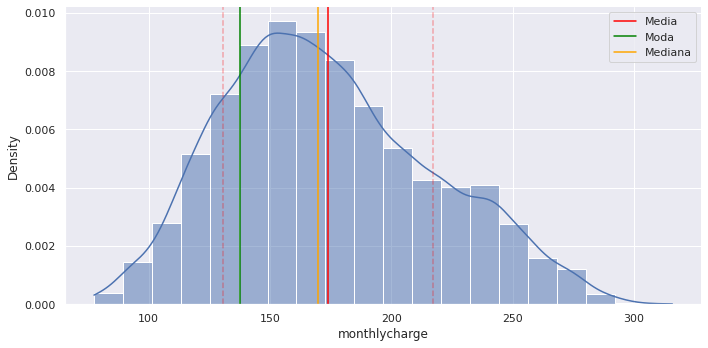

In [ ]:
#Histograma y curva de densidad de la variable "monthlycharge" con media, mediana y moda:
plt.figure(figsize=(10, 9))
ax = sns.displot(data=df, 
                 x = variable, 
                 kde=True,
                stat="density",
                height=5,
                aspect=2,
                bins = 20)

plt.axvline(media,
           color = "red",
           label = 'Media')

plt.axvline(media - stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(media + stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(moda,
           color = "green",
           alpha = 1,
           label = 'Moda')

plt.axvline(mediana,
           color = "orange",
           alpha = 1,
           label = 'Mediana')

plt.legend()

plt.show();

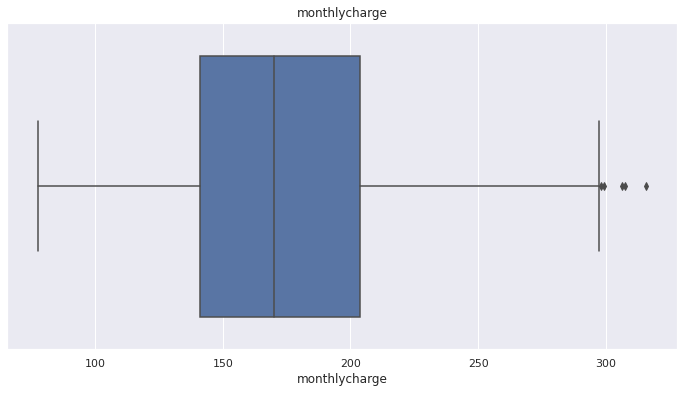

In [ ]:
#Boxplot para ña variable "monthlycharge":
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['monthlycharge'])
plt.title('monthlycharge')
plt.xlabel('monthlycharge')
plt.show()

In [ ]:
#Análisis de valores únicos de variables categóricas
cat_columns=['gender', 'marital', 'education']

for i in cat_columns:
    print(df[i].name)
    print(df[i].unique())

gender
['Male' 'Female' 'Prefer not to answer']
marital
['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
education
["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']


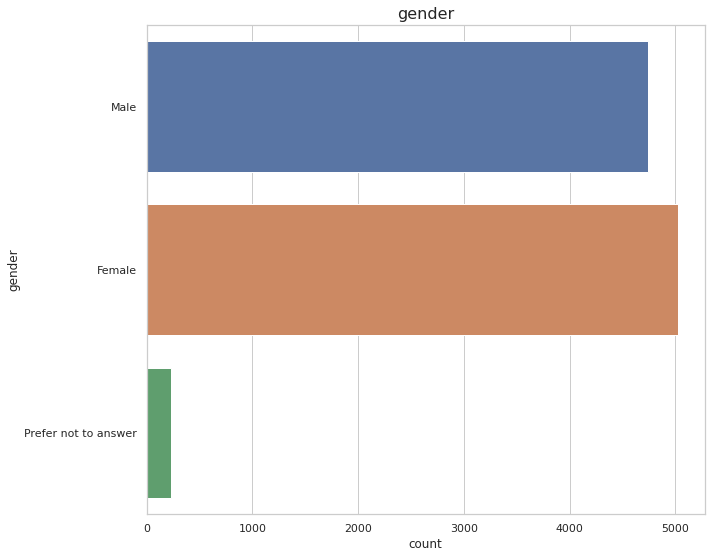

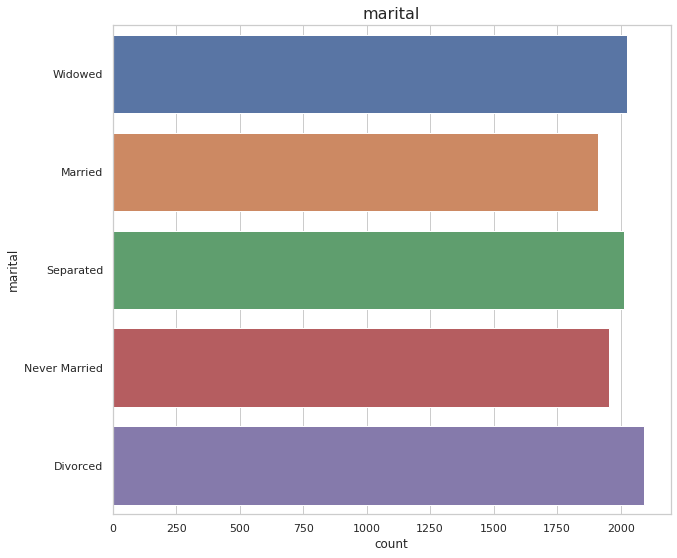

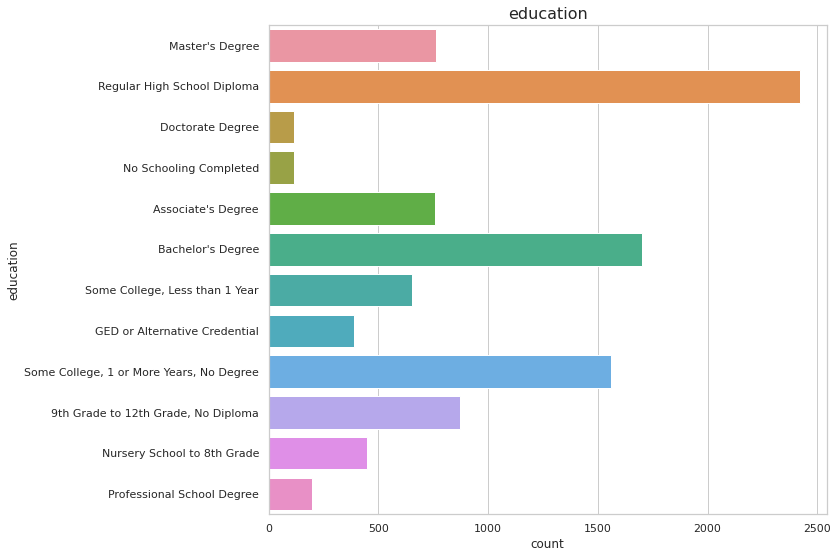

In [ ]:
#Análisis de frecuencias de variables categóricas (excepto    )
cat_columns=['gender', 'marital', 'education']

for i in cat_columns:
    df[i] = df[i].str.rstrip()

for i in cat_columns:
    plt.figure(figsize=(10,9))
    plt.title(i,fontsize=16)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(y=df[i])
    plt.show()